# Import libraries

In [11]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
training_data_folder_path = 'images/'
test_data_folder_path = 'test/'

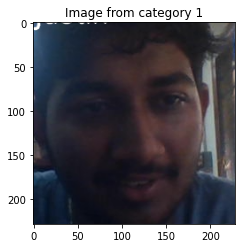

In [13]:
random_image = cv2.imread('./7.png')
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('Image from category 1')# change category name accordingly
plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB))
plt.show()

# face detection

In [14]:
haarcascade_frontalface = './haarcascade_frontalface.xml'

In [15]:
def detect_face(input_img):
    image = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface.xml')
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.2, minNeighbors=5);
    if (len(faces) == 0):
        return -1, -1
    (x, y, w, h) = faces[0]
    return image[y:y+w, x:x+h], faces[0]

# prepare training dataset

In [24]:
def prepare_training_data(training_data_folder_path):
    detected_faces = []
    face_labels = []
    traning_image_dirs = os.listdir(training_data_folder_path)
    for dir_name in traning_image_dirs:
        label = int(dir_name)
        training_image_path = training_data_folder_path + "/" + dir_name
        training_images_names = os.listdir(training_image_path)
        
        for image_name in training_images_names:
            image_path = training_image_path  + "/" + image_name
            image = cv2.imread(image_path)
            face, rect = detect_face(image)
           
            if type(face) != type(-1):
                resized_face = cv2.resize(face, (121,121), interpolation = cv2.INTER_AREA)
                detected_faces.append(resized_face)
                face_labels.append(label)

    return detected_faces, face_labels

In [25]:
detected_faces, face_labels = prepare_training_data("images/")

In [26]:
print("Total faces: ", len(detected_faces))
print("Total labels: ", len(face_labels))

Total faces:  19
Total labels:  19


# initialize a face recognizer

In [27]:
eigenfaces_recognizer = cv2.face.EigenFaceRecognizer_create()

# train the face recognizer model

In [28]:
eigenfaces_recognizer.train(detected_faces, np.array(face_labels))

In [38]:
def draw_rectangle(test_image, rect):
    (x, y, w, h) = rect
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

def draw_text(test_image, label_text, x, y):
    cv2.putText(test_image, label_text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

# predict output on test data

In [37]:
def predict(test_image):
    detected_face, rect = detect_face(test_image)
    resized_test_image = cv2.resize(detected_face, (121,121), interpolation = cv2.INTER_AREA)
    label= eigenfaces_recognizer.predict(resized_test_image)
    label_text = tags[label[0]]
    if type(rect) != type(-1):
        draw_rectangle(test_image, rect)
        draw_text(test_image, label_text, rect[0], rect[1]-5)
    else:
        print("No face found")
        label_text="Unknown Person"
    return test_image, label_text

In [31]:
tags = ['0', '1', '2', '3', '4']

In [46]:
test_image = cv2.imread("./images/0/2.jpg")

In [56]:
predicted_image, label = predict(test_image)

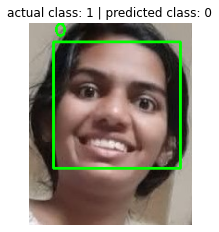

In [48]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[1]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [55]:
name=dict()
name['0']='Aishu'
name['1']='Amulya'
name['2']='Kiran'
name['3']='Sushi'
name['4']='VV'

In [53]:
print(name[label])

def text_to_speech(label):
    import pyttsx3
    engine = pyttsx3.init()
    engine.say(name[label]+" is at the door")
    engine.runAndWait()
    return name[label]

text_to_speech(label)

Aishu


'Aishu'

In [54]:
#save the model
eigenfaces_recognizer.save('eigenfaces_recognizer.xml')

#load the model
eigenfaces_recognizer = cv2.face.EigenFaceRecognizer_create()
eigenfaces_recognizer.read('eigenfaces_recognizer.xml')
#test the model
test_image = cv2.imread("./test/0/2.jpg")
predicted_image, label = predict(test_image)
text_to_speech(label)

'Aishu'